In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import random

In [28]:
def generate_prior_ginibre(n):
    # draw n states from the ginibre distribution (unbiased)
    x_0 = np.zeros((n, 3))
    w_0 = np.ones(n)/n
    for i in range(n):
        dm = qt.rand_dm_ginibre(dim)
        x_0[i] = np.array([qt.expect(j, dm) for j in s]) # calculate pauli representation
    return x_0, w_0

def pauli_measurement(rho, c):
    # create a measurement outcome of the state rho (in pauli representation) when measured in basis c
    prob = (rho[c]+1)/2
    if random.uniform(0, 1) < prob: res = 1
    else: res = 0
    return res
    
def likelihood(x, d, c):
    # calculate likelihood of measurement outcome d given that the state is x
    p_likelihood = np.zeros(len(x))
    for idx, x_i in enumerate(x[:, c]):
        if d==1: p_likelihood[idx] = (x_i + 1)/2
        else: p_likelihood[idx] = 1 - (x_i + 1)/2
    return p_likelihood

def update_weights(x, w, d, c):
    # update weights according to likelihood and normalize, check whether resampling is required
    w_new = w * likelihood(x, d, c)
    w_new = w_new / np.sum(w_new)
    #n_eff = np.sum(1/w_new**2)
    n_eff = 1
    if n_eff / len(w) < thr_resampling: resampling_required = 1
    else: resampling_required = 1
    return w_new, resampling_required

def pointestimate(x, w):
    # return point estimate of rho
    return np.average(x, axis=0, weights= w)

def plot2D_samples(x, w, rho, projection= [0, 1], scale= 1, size= (5, 5)):
    # plot sample points
    fig = plt.figure(figsize=(size))
    plt.scatter(x[:,projection[0]], x[:,projection[1]], s= w * len(w) * scale)
    plt.scatter(rho[projection[0]], rho[projection[1]], c='red', s=5 * scale)
    plt.show()

In [49]:
n_q = 1 #number of Qubits
dim = 2**n_q #Dimension of Hilbert space

rho = np.array([0, 0.2, 0.5])

s = [qt.sigmax(), qt.sigmay(), qt. sigmaz()] #MeasurementBasis

n_meas = 3000 # number of measurements
c_meas = np.random.randint(0, 3, n_meas) # random measurement basis
#c_meas = np.ones(n_meas, dtype= int) * 0
d_meas = np.array([pauli_measurement(rho, c_i) for c_i in c_meas]) # generate random measurements on rho

In [58]:
n = 20000 # number of sampling points
thr_resampling = 0.5 # resampling threshold
flag_resampling = 0 # resampling required

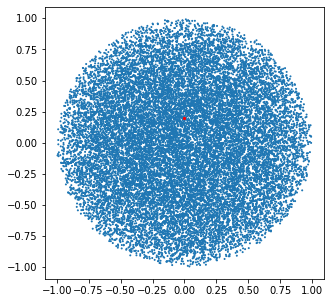

In [59]:
x, w = generate_prior_ginibre(n)
#x = np.array([[0, 0, 0], [0.25, 0, 0]])
#w = np.array([1/2, 1/2])
plot2D_samples(x, w, rho)

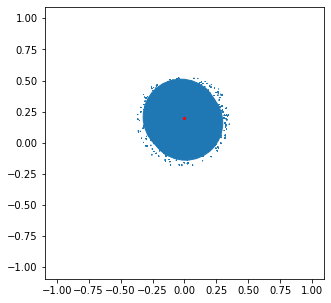

In [60]:
for i in range(n_meas):
    w, flag_resampling = update_weights(x, w, d_meas[i], c_meas[i])
plot2D_samples(x, w, rho)

In [61]:
print(pointestimate(x, w))

[-0.01045675  0.19429502  0.48904942]
